# Siegle et al (2021) Dataset Tutorial 

*Author: Dhruv Mehrotra*


This notebook demonstrates how we use Pynapple on various publicly available datasets in systems neuroscience to streamline analysis. In this notebook, we will examine the dataset from Siegle et al (2021), which was used to generate Figure 4b in the publication. 

More information regarding this dataset can be found <a href="https://allensdk.readthedocs.io/en/2.16.0/visual_coding_neuropixels.html" target="_blank">here</a>. We will be using the Allen Software Development Kit (AllenSDK) to download and use the data. Please make sure AllenSDK is installed on your system, a helpful installation guide is available <a href="https://allensdk.readthedocs.io/en/latest/install.html" target="_blank">here</a>.

See the <a href="https://peyrachelab.github.io/pynapple/#installation" target="_blank">documentation</a> of Pynapple for instructions on installing the package.

First, import the necessary libraries: 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pynapple as nap

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

The __EcephysProjectCache__ object of the AllenSDK delivers the data to you as ready-to-analyze Python objects. It automatically keeps track of which files are stored locally, and will download additional files as needed.

The next bit involves dowloading the data onto your local machine. This section is adapted from <a href="https://allensdk.readthedocs.io/en/2.16.0/_static/examples/nb/ecephys_data_access.html" target="_blank">here</a>, where you can find a more detailed account of how to use data from the Allen Institute.

Before downloading the data, you must decide where the manifest.json file lives. This file serves as the map that guides the EcephysProjectCache object to the file locations.

When you initialize a local cache for the first time, it will create the manifest file at the path that you specify. This file lives in the same directory as the rest of the data, so make sure you put it somewhere that has enough space available.

When you need to access the data in subsequent analysis sessions, you should point the EcephysProjectCache object to an existing manifest.json file; otherwise, it will try to re-download the data in a new location.

Then we can create the cache object, specifying both the local storage directory (the manifest_path) and the remote storage location (the Allen Institute data warehouse).


In [3]:
manifest_path = os.path.join(os.getcwd(), "manifest.json")
cache = EcephysProjectCache.from_warehouse(manifest = manifest_path)

Let's examine the sessions we have:

In [4]:
sessions = cache.get_session_table()

sessions

,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,"[grey, VISpm, nan, VISp, VISl, VISal, VISrl]"
737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,"[grey, VISmma, nan, VISpm, VISp, VISl, VISrl]"
739448407,2019-10-03T00:00:00Z,716813543,brain_observatory_1.1,112.0,M,wt/wt,625,2221,6,"[grey, VISam, nan, VIS, VISp, VISl, VISrl]"
742951821,2019-10-03T00:00:00Z,723627604,brain_observatory_1.1,120.0,M,wt/wt,893,2219,6,"[VISal, nan, grey, VISl, VISrl, VISp, VISpm, VIS]"
743475441,2019-10-03T00:00:00Z,722882755,brain_observatory_1.1,121.0,M,wt/wt,553,2225,6,"[LP, LGd, HPF, DG, CA3, CA1, VISrl, nan, PP, P..."
744228101,2019-10-03T00:00:00Z,719817805,brain_observatory_1.1,122.0,M,wt/wt,659,2226,6,"[Eth, TH, LP, POL, APN, DG, CA1, VIS, nan, CA3..."


This table gives a comprehensive account of all the session details. Let's see the major types of sessions we have:

In [5]:
print(cache.get_all_session_types())

['brain_observatory_1.1', 'functional_connectivity']


There are 2 types of sessions in this dataset. More information about session types can be found <a href="https://allensdk.readthedocs.io/en/2.16.0/visual_coding_neuropixels.html" target="_blank">here</a>. For our purposes, we will choose the brain observatory sessions, as they have drifting gratings with 8 orientations.

In [6]:
brain_observatory_type_sessions = sessions[sessions["session_type"] == "brain_observatory_1.1"]

#Show summary of brain observatory sessions
brain_observatory_type_sessions.head()

,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,"[grey, VISpm, nan, VISp, VISl, VISal, VISrl]"
737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,"[grey, VISmma, nan, VISpm, VISp, VISl, VISrl]"


We arbitrarily pick one of the sessions from this list for our analysis.

In [7]:
session_id = 732592105 #We pick this session
session = cache.get_session_data(session_id) #Download the session 

Let's examine the types of stimuli presented in this session.

In [8]:
session.get_stimulus_table()

,color,contrast,frame,orientation,phase,size,spatial_frequency,start_time,stimulus_block,stimulus_name,stop_time,temporal_frequency,x_position,y_position,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,,,,,
0,null,null,null,null,null,null,null,21.579074,null,spontaneous,81.645874,null,null,null,60.066800,0
1,null,0.8,null,45.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,81.645874,0.0,gabors,81.879397,4.0,-30.0,-20.0,0.233523,1
2,null,0.8,null,90.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,81.879397,0.0,gabors,82.129600,4.0,20.0,-10.0,0.250203,2
3,null,0.8,null,90.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,82.129600,0.0,gabors,82.379803,4.0,40.0,30.0,0.250203,3
4,null,0.8,null,45.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,82.379803,0.0,gabors,82.630006,4.0,40.0,-40.0,0.250203,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70383,null,0.8,null,60.0,0.75,"[250.0, 250.0]",0.04,9142.164805,14.0,static_gratings,9142.415016,null,null,null,0.250210,4806
70384,null,0.8,null,30.0,0.0,"[250.0, 250.0]",0.08,9142.415016,14.0,static_gratings,9142.665223,null,null,null,0.250207,4857
70385,null,0.8,null,60.0,0.75,"[250.0, 250.0]",0.32,9142.665223,14.0,static_gratings,9142.915430,null,null,null,0.250207,4876


This table has a comprehensive list of all the stimuli and its characteristics. For our purposes, we will only examine the drifting gratings. 

In [11]:
driftstim = session.get_stimulus_table(['drifting_gratings']) #Get drifting grating stimuli 

#Time to use Pynapple! 
#Create an IntervalSet with the start and stop times of drifting gratings
epoch = nap.IntervalSet(start = driftstim['start_time'], end = driftstim['stop_time'], time_units = 's')

#Visualize the epoch
epoch

,start,end
0,1582.883624,1584.885254
1,1585.886106,1587.887776
2,1588.888594,1590.890294
3,1591.891116,1593.892796
4,1594.893664,1596.895314
...,...,...
5,5375.251646,5377.253316
6,5378.254184,5380.255834
7,5381.256656,5383.258336
8,5384.259204,5386.260854


We can now conveniently access all the drifting grating trials. 

***

## Step-by-step tutorial

### Orientation Tuning Curves

Now, let's find some units and plot their tuning curves! 

The primary visual cortex (V1) is known to have orientation tuning. Therefore, we will find units recorded in V1 and look at their responses to drifting gratings. To do so, we must first select units recorded in V1.

In [12]:
units = session.units[session.units["ecephys_structure_acronym"] == 'VISp'] #Select units in V1 
units_with_high_snr = units[units['snr'] > 4] #Select units with high signal-to-noise (SnR) ratio
high_snr_unit_ids = units_with_high_snr.index.values #Get unit IDs of high SnR

#Let's see how many units we have
units_with_high_snr

,waveform_PT_ratio,waveform_amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,L_ratio,...,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data
unit_id,,,,,,,,,,,,,,,,,,,,,
915960317,0.500665,145.342665,0.000005,340,188.64,6.324283,5.734863,0.003632,86.304506,2.468253e-04,...,385.0,VISp,NaN,NaN,NaN,probeC,See electrode locations,29999.991665,1249.999653,True
915960312,0.474360,186.312360,0.033885,339,90.45,4.099412,0.226459,0.000000,45.657709,1.395749e-03,...,385.0,VISp,NaN,NaN,NaN,probeC,See electrode locations,29999.991665,1249.999653,True
915960330,0.537582,172.424850,0.001525,343,98.15,5.087503,1.066119,0.490380,50.376811,1.805190e-03,...,385.0,VISp,NaN,NaN,NaN,probeC,See electrode locations,29999.991665,1249.999653,True
915960359,0.561683,169.444080,0.004483,352,138.72,5.225291,1.435973,0.077230,55.298175,2.098185e-03,...,385.0,VISp,NaN,NaN,NaN,probeC,See electrode locations,29999.991665,1249.999653,True
915960460,0.697996,452.087805,0.000004,382,117.94,8.128883,15.016905,0.000530,134.322146,7.551944e-08,...,385.0,VISp,NaN,NaN,NaN,probeC,See electrode locations,29999.991665,1249.999653,True
915960562,0.532659,364.425945,0.000330,408,252.29,5.355198,10.825190,0.014609,73.237770,8.179673e-04,...,385.0,VISp,NaN,NaN,NaN,probeC,See electrode locations,29999.991665,1249.999653,True
915960624,0.465205,321.817860,0.000061,428,210.55,6.058147,13.999222,0.004672,106.041157,4.566157e-05,...,385.0,VISp,NaN,NaN,NaN,probeC,See electrode locations,29999.991665,1249.999653,True
915960848,0.358100,431.861625,0.001946,497,97.11,6.777499,0.849963,0.495973,63.549831,6.243700e-04,...,385.0,VISp,NaN,NaN,NaN,probeC,See electrode locations,29999.991665,1249.999653,True
915960876,0.412983,348.758475,0.000957,507,223.83,5.740318,1.441071,0.038342,79.911522,9.804225e-05,...,385.0,VISp,NaN,NaN,NaN,probeC,See electrode locations,29999.991665,1249.999653,True


We have 15 high SnR units in V1, and this table lists all their characteristics.

Let's get the spike times of these units, and put them in a Pynapple TsGroup. 

In [14]:
spikes = session.spike_times #Get spike times for all units in the session

#Create Pynapple TsGroup, using unit IDs as keys
spike_times = nap.TsGroup(
     {
      unit_id:nap.Ts(spikes[unit_id], time_units = 's') for unit_id in spikes
      })

spike_times = spike_times[high_snr_unit_ids] #Spike times for high SnR units

#What does this look like? 
spike_times

    Index    Freq. (Hz)
---------  ------------
915960312          0.23
915960317          5.73
915960330          1.07
915960359          1.44
915960460         15.02
915960562         10.83
915960624         14
915960848          0.85
915960876          1.44
915960921          0.83
915960947          1.2
915960962          0.98
915960968          0.63
915960975          0.54
915960996          0.51

The spike times TsGroup has 2 columns. The unit ID, and the firing rate of the units in Hz.

To plot orientation tuning curves, we first need to get the range of orientations displayed, as follows:

In [19]:
ori = driftstim['orientation'].values #Get the orientations of the drifting gratings

#What does this look like? 
ori

array([0.0, 45.0, 225.0, 0.0, 0.0, 270.0, 180.0, 225.0, 180.0, 315.0,
       180.0, 0.0, 180.0, 90.0, 135.0, 0.0, 'null', 225.0, 'null', 135.0,
       0.0, 45.0, 270.0, 225.0, 270.0, 45.0, 90.0, 90.0, 315.0, 135.0,
       315.0, 0.0, 90.0, 135.0, 180.0, 90.0, 270.0, 135.0, 135.0, 135.0,
       180.0, 180.0, 135.0, 270.0, 225.0, 135.0, 90.0, 225.0, 225.0,
       135.0, 90.0, 270.0, 90.0, 270.0, 0.0, 90.0, 0.0, 225.0, 225.0,
       90.0, 'null', 270.0, 315.0, 180.0, 270.0, 90.0, 180.0, 135.0,
       225.0, 315.0, 0.0, 135.0, 90.0, 135.0, 0.0, 0.0, 135.0, 45.0,
       270.0, 270.0, 45.0, 315.0, 315.0, 315.0, 'null', 135.0, 270.0,
       90.0, 270.0, 0.0, 180.0, 270.0, 'null', 90.0, 270.0, 135.0, 225.0,
       315.0, 0.0, 180.0, 0.0, 45.0, 270.0, 180.0, 225.0, 270.0, 45.0,
       45.0, 270.0, 180.0, 225.0, 0.0, 45.0, 180.0, 180.0, 'null', 180.0,
       135.0, 315.0, 180.0, 270.0, 'null', 45.0, 90.0, 225.0, 270.0,
       225.0, 225.0, 45.0, 315.0, 225.0, 0.0, 270.0, 135.0, 45.0, 90.0,
     

The orientation data is organized as an object array, with some trials having null values. We will convert these orientations into floats for easier handling, as shown below: 

In [23]:
ori[ori == 'null'] = np.nan #Replace all null values with NaN
ori = ori.astype(float) #Convert into a float array
ang_range = np.unique(ori)[0:-1] #Find the unique values in this array and exclude the NaNs, to get the list of orientations

#What does this look like? 
ang_range

/tmp/ipykernel_6015/3474030339.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ori[ori == 'null'] = np.nan #Replace all null values with NaN


array([  0.,  45.,  90., 135., 180., 225., 270., 315.])

These are the 8 orientations of the drifting gratings, sampling 360 degrees at 45 degree intervals. 

Now, we need to create a dictionary of IntervalSets for each orientation. This will tell us all the trial timings for a given orientation. We do so as follows: 

In [27]:
dict_ep = {} #Initialize empty dictionary

for j in ang_range:
    
    tokeep = [] #Create a list of trials to keep
    
    for i in range(len(epoch)): #Loop over all grating trials
        if float(ori[i] ) == j: #Find those trials with a given orientation  
            tokeep.append(i)  

    dict_ep[j] = epoch.loc[tokeep] #Make the dictionary of IntervalSets

#What does this look like? 
dict_ep

{0.0:           start          end
 0   1582.883624  1584.885254
 1   1591.891116  1593.892796
 2   1594.893664  1596.895314
 3   1615.911186  1617.912876
 4   1627.921236  1629.922916
 ..          ...          ...
 69  5315.201496  5317.203176
 70  5327.211526  5329.213206
 71  5348.229094  5350.230754
 72  5351.231596  5353.233256
 73  5384.259204  5386.260854
 
 [74 rows x 2 columns],
 45.0:           start          end
 0   1585.886106  1587.887776
 1   1645.936286  1647.937966
 2   1657.946336  1659.947996
 3   1814.076806  1816.078496
 4   1823.084294  1825.086004
 ..          ...          ...
 70  5198.103674  5200.105344
 71  5216.118734  5218.120404
 72  5258.153854  5260.155514
 73  5309.196486  5311.198166
 74  5387.261686  5389.263356
 
 [75 rows x 2 columns],
 90.0:           start          end
 0   1621.916206  1623.917896
 1   1660.948864  1662.950504
 2   1663.951346  1665.953026
 3   1678.963904  1680.965624
 4   1687.971426  1689.973096
 ..          ...          ...
 

This dictionary shows all the trials, now ordered by orientation. We can use this to compute the orientation tuning curves. Since the stimuli are presented in discrete orientations (i.e. not spannning all angular values from 0 to 360 degrees), we will be using Pynapple's *compute_discrete_tuning_curves*.

Computing the tuning curves looks so easy in Pynapple, just a single line of code! 

In [31]:
#Plot firing rate of V1 units as a function of orientation, i.e. an orientation tuning curve 
discrete_tuning_curves =  nap.compute_discrete_tuning_curves(spike_times, dict_ep) 

#What does this look like? 
discrete_tuning_curves

/home/dhruv/pynapple/pynapple/core/time_series.py:154: RuntimeWarning: invalid value encountered in double_scalars
  self.rate = len(t) / self.time_support.tot_length("s")


,915960312,915960317,915960330,915960359,915960460,915960562,915960624,915960848,915960876,915960921,915960947,915960962,915960968,915960975,915960996
0.0,0.047247,1.943892,0.128243,0.047247,19.499663,9.003998,7.519081,0.236237,0.377979,0.053997,0.249736,0.236237,0.101244,0.040498,0.053997
45.0,0.000000,1.065771,0.086594,1.338875,24.352867,8.666050,8.959137,0.119899,0.592835,0.039966,0.073272,0.299748,0.159866,0.006661,0.039966
90.0,0.195760,1.269065,0.121506,0.202510,25.455556,12.710902,9.295227,0.587280,0.486025,0.033752,0.425272,0.108006,0.290265,0.060753,0.047252
135.0,0.006661,0.839298,0.592837,0.059950,18.564462,7.553678,8.892557,0.119900,0.819314,0.226477,0.153205,1.698578,0.126561,0.053289,0.026644
180.0,0.013322,2.178187,0.093256,0.026644,16.852642,8.672783,7.880109,0.159867,0.333056,0.126561,1.512075,0.193173,0.026644,0.093256,0.006661
225.0,0.019983,1.338874,0.046627,1.252281,18.171391,9.045729,7.540328,0.059950,0.566191,0.139882,0.592835,0.539546,0.019983,0.159866,0.013322
270.0,0.173169,1.758331,0.046622,0.346338,23.677527,10.709835,10.123725,0.339678,0.186490,0.153188,0.626072,0.219791,0.093245,0.033302,0.013321
315.0,0.026644,0.905908,0.199833,0.093255,20.496160,8.059914,8.213119,0.186510,0.586176,0.033305,0.066611,2.604484,0.206494,0.033305,0.033305


Each column is a single unit, and each row is the orientation of the stimulus (in degrees). The values in the table indicate the firing rate of the unit (in Hz). Let's plot them!

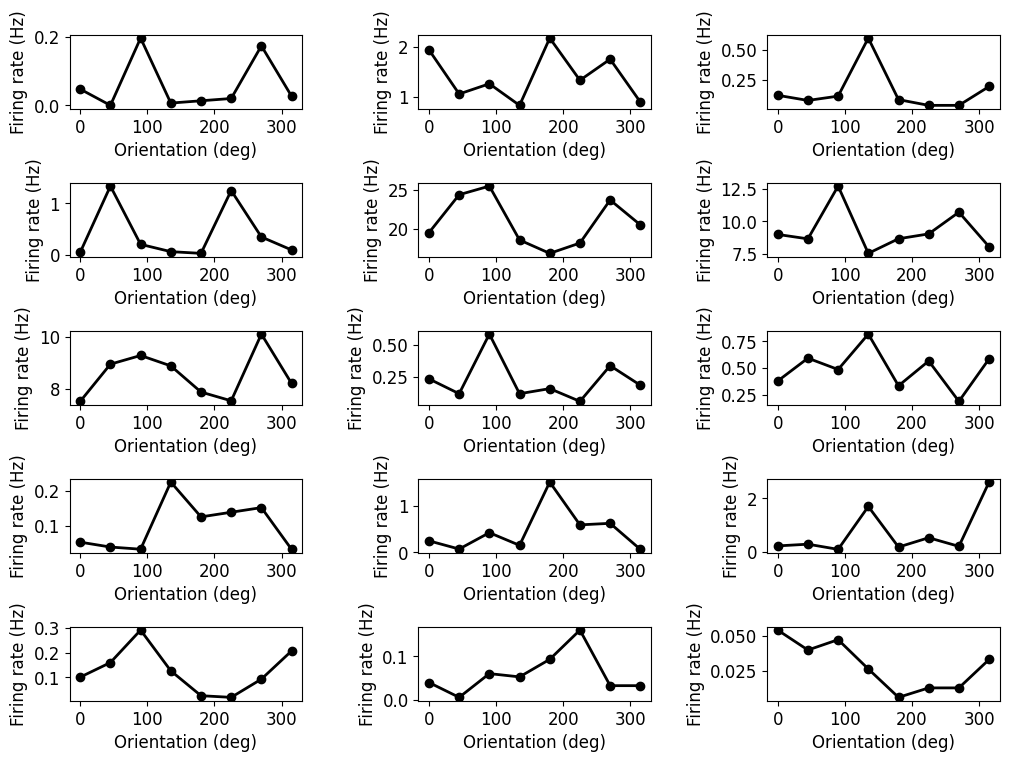

In [52]:
plt.figure(figsize = (12,9)) 
for i in range(len(spkindex)): #Loop over all unit IDs
    plt.subplot(5,3,i+1) #Plot tuning curves in 5 rows and 3 columns
    plt.plot(discrete_tuning_curves[spkindex[i]],'o-', color = 'k', linewidth = 2) 
    plt.xlabel('Orientation (deg)') #Orientation in degrees, on the X-axis
    plt.ylabel('Firing rate (Hz)') #Firing rate in Hz, on the Y-axis
    plt.subplots_adjust(wspace = 0.5, hspace = 1, top = 0.85) 
     

Awesome!

***

### Cross-correlogram

Now that we have orientation tuning curves, we can go one step further. We will take 2 units and compute their cross-correlation. This will tell us the temporal relationship between the firing of the 2 units with respect to each other.

For the purposes of demonstration, we will pick 2 units arbitrarily. We will pick the units whose orientation tuning curves are shown below: 

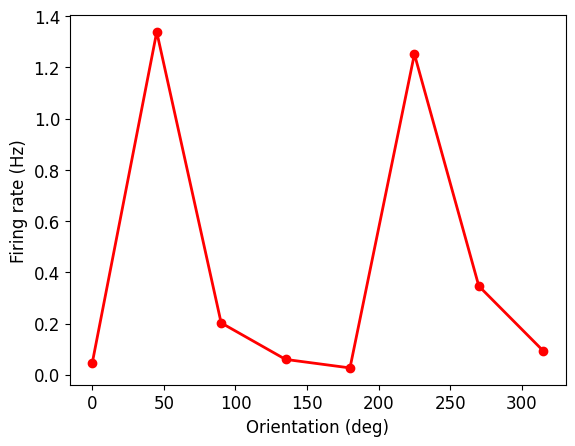

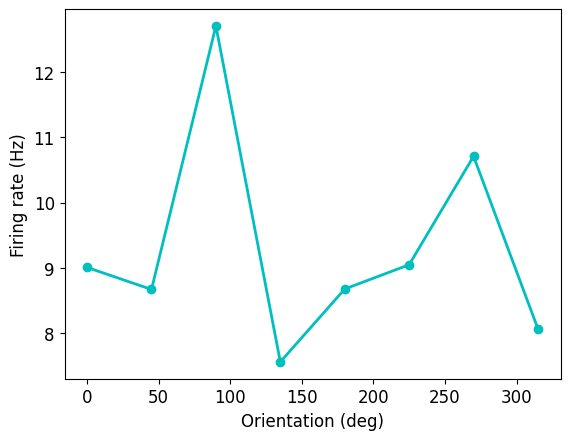

In [60]:
for i in [3,5]:
    if i == 3:
        c = 'r' #Set the colour to red
    elif i == 5:
        c ='c' #Set the colour to cyan

    plt.figure()
    plt.plot(discrete_tuning_curves[spkindex[i]],'o-', color = c, linewidth = 2)
    plt.xlabel('Orientation (deg)') #Orientation in degrees, on the X-axis
    plt.ylabel('Firing rate (Hz)') #Firing rate in Hz, on the Y-axis
    

We will now compute the cross-correlogram for these 2 units. How many lines of code would this take? \
With Pynapple, just one line is enough! 

Text(0, 0.5, 'Norm. Firing rate')

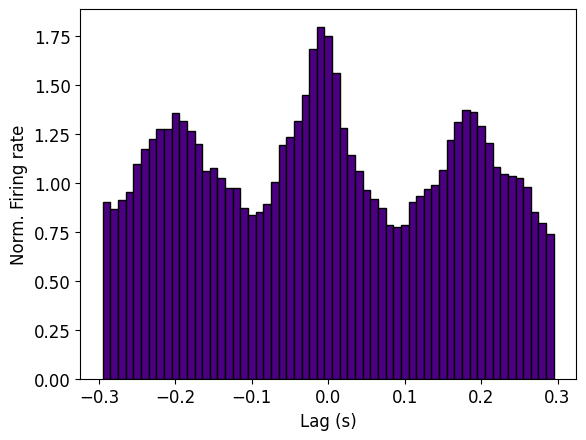

In [68]:
#Compute cross-correlation for all unit pairs
cc =  nap.compute_crosscorrelogram(spike_times, binsize = 0.01, windowsize = 0.3 , ep = epoch, norm = True, time_units = 's', reverse = False) 

#Get the cross-correlogram for our example units 
cc_35 = cc[spkindex[3]][spkindex[5]]

#Let's smoothen the cross-correlogram a bit
cc_35_smooth = cc_35.rolling(4, win_type = 'gaussian', min_periods = 1, center = True, axis = 0).mean(std = 2) 

#Now let's plot it!
plt.figure()
plt.rc('font', size = 12) 
plt.bar(cc_35_smooth.index.values, cc_35_smooth.values, width = 0.01, color = 'indigo', edgecolor = 'k') #Plot as bars
plt.xlabel('Lag (s)') #Time lag in seconds, on the X-axis
plt.ylabel('Norm. Firing rate') #Firing rate normalized to the mean firing rate of the reference unit, on the Y-axis

We observe peaks in the cross-correlogram. What do they mean? \
The peak at zero lag indicates that the units fire synchronously. This makes sense, as their preferred orientations overlap.\
The peak at 0.2s suggests an oscillatory co-modulation at about 5Hz during visual stimulation.

I hope this tutorial was helpful. If you have any questions, comments or suggestions, please feel free to reach out to the Pynapple Team!